In [1]:
import nibabel as nib

In [2]:
nii = nib.load('862ss2c500regcUKFCC.nii')

In [3]:
data = nii.get_data()

In [4]:
data.shape

(42, 32, 15, 2671)

In [5]:
import numpy as np

In [6]:
D = np.reshape(data,(42*32*15,2671))

In [7]:
np.save('centraltest.npy', D)

In [10]:
d = tsc.loadSeries('centraltest.npy', inputFormat='npy', minPartitions=5)
d.first()

(0, array([-0.20409763, -0.15216248, -0.15467691, ...,  0.11422426,
         0.07105274,  0.03869029], dtype=float32))

In [30]:
d

Series
nrecords: None (inspect to compute)
dtype: float32
dims: None (inspect to compute)
index: [   0    1    2 ..., 2668 2669 2670]

In [12]:
data2 = d.toTimeSeries().normalize()

In [13]:
data2.cache()

TimeSeries
nrecords: None (inspect to compute)
dtype: None (inspect to compute)
dims: None (inspect to compute)
index: [   0    1    2 ..., 2668 2669 2670]

In [14]:
from thunder import PCA

In [15]:
model = PCA(k=40).fit(data2)

In [25]:
imgs = model.scores

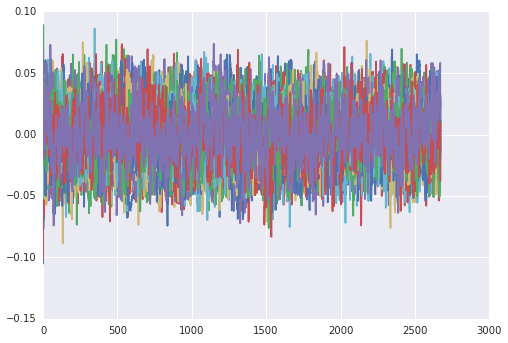

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image
plt.plot(model.comps.T);

In [21]:
model

In [22]:
A=model.comps

In [24]:
A.shape

(40, 2671)

In [26]:
imgs.shape

AttributeError: 'RowMatrix' object has no attribute 'shape'

In [28]:
svdtry = thunder.SVD(k=40).calc(data2)

In [36]:
svdu=svdtry.u

In [32]:
np.save('svds.npy',svdtry.s)

In [33]:
np.save('svdv.npy',svdtry.v)

In [37]:
svdu.saveAsBinarySeries('svdu')	

ValueError: Path svdu appears to already exist. Specify a new directory, or call with overwrite=True to overwrite.